#             **Car Insurance Claim Prediction**


---



#Importing Libraries and loading the dataset

In [ ]:

#For Dataset Handling
import pandas as pd
import numpy as np

#For Plotting
import matplotlib.pyplot as plt
import seaborn as sns

#For Preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

#For model building
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,KFold



#For Metrics evaluation
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,ConfusionMatrixDisplay

#Misc.
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Reading the dataset

df=pd.read_csv('/content/drive/MyDrive/Datasets/Project/train.csv')
df.head(10)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
5,ID00006,1.018709,0.07,0.519231,C6,13051,3,C2,M4,Diesel,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
6,ID00007,0.097992,0.16,0.403846,C7,6112,4,B2,M5,Diesel,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0
7,ID00008,0.509085,0.14,0.423077,C8,8794,1,B2,M6,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
8,ID00009,0.282394,0.07,0.298077,C7,6112,3,C2,M4,Diesel,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
9,ID00010,0.566255,0.04,0.442308,C9,17804,1,B2,M7,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0,0


#Dataset Analysis

In [ ]:
# Checking the shape of the dataset

print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset has 58592 rows and 44 columns.


In [ ]:
#Checking for missing values

print(f'The total number of null values in the dataset : {df.isna().sum().sum()}')


The total number of null values in the dataset : 0


In [ ]:
#Checking for the counts of dtypes in the dataset

df.dtypes.value_counts()

object     28
int64      12
float64     4
dtype: int64

In [ ]:
# Checking the number of duplicate records in the dataset

print(f"The total number of duplicate records in the dataset : {df.duplicated().sum()}")

The total number of duplicate records in the dataset : 0


In [ ]:
# Checking the statistical summary of the dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
policy_tenure,58592.0,0.611246,0.414156,0.002735,0.210250,0.573792,1.039104,1.396641
age_of_car,58592.0,0.069424,0.056721,0.000000,0.020000,0.060000,0.110000,1.000000
age_of_policyholder,58592.0,0.469420,0.122886,0.288462,0.365385,0.451923,0.548077,1.000000
population_density,58592.0,18826.858667,17660.174792,290.000000,6112.000000,8794.000000,27003.000000,73430.000000
make,58592.0,1.763722,1.136988,1.000000,1.000000,1.000000,3.000000,5.000000
airbags,58592.0,3.137066,1.832641,1.000000,2.000000,2.000000,6.000000,6.000000
displacement,58592.0,1162.355851,266.304786,796.000000,796.000000,1197.000000,1493.000000,1498.000000
cylinder,58592.0,3.626963,0.483616,3.000000,3.000000,4.000000,4.000000,4.000000
gear_box,58592.0,5.245443,0.430353,5.000000,5.000000,5.000000,5.000000,6.000000
turning_radius,58592.0,4.852893,0.228061,4.500000,4.600000,4.800000,5.000000,5.200000


In [ ]:
# Dropping the unnecessary policy id column

df.drop(columns=['policy_id'],inplace=True)
df.head(10)

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
5,1.018709,0.07,0.519231,C6,13051,3,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
6,0.097992,0.16,0.403846,C7,6112,4,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0
7,0.509085,0.14,0.423077,C8,8794,1,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
8,0.282394,0.07,0.298077,C7,6112,3,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
9,0.566255,0.04,0.442308,C9,17804,1,B2,M7,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0,0


In [ ]:
# Checking the correlation among the numerical features

df.corr()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
policy_tenure,1.000000,0.166312,0.143676,-0.100307,0.086101,0.103981,0.194361,0.191185,0.095305,0.166426,0.190869,0.213228,0.119055,0.141027,0.173280,0.078747
age_of_car,0.166312,1.000000,-0.035427,-0.062255,0.188122,0.209073,0.393208,0.379522,0.201579,0.332716,0.383177,0.414104,0.259156,0.302127,0.348853,-0.028172
age_of_policyholder,0.143676,-0.035427,1.000000,0.009669,-0.031989,-0.008041,-0.023764,0.004183,-0.003115,-0.016764,-0.020138,-0.006135,-0.053930,-0.007758,-0.031628,0.022435
population_density,-0.100307,-0.062255,0.009669,1.000000,-0.035125,-0.060359,-0.090983,-0.091591,-0.056640,-0.077501,-0.091968,-0.098156,-0.065583,-0.077816,-0.071150,-0.017808
make,0.086101,0.188122,-0.031989,-0.035125,1.000000,0.501800,0.753344,0.410672,0.632807,0.753861,0.692365,0.511695,0.303274,0.481408,0.792254,-0.000456
airbags,0.103981,0.209073,-0.008041,-0.060359,0.501800,1.000000,0.661190,0.478594,0.859556,0.810820,0.809094,0.639562,0.423816,0.828988,0.341557,0.002789
displacement,0.194361,0.393208,-0.023764,-0.090983,0.753344,0.661190,1.000000,0.866231,0.692240,0.875407,0.961655,0.899302,0.554591,0.776210,0.847065,0.007678
cylinder,0.191185,0.379522,0.004183,-0.091591,0.410672,0.478594,0.866231,1.000000,0.410163,0.615806,0.805476,0.862430,0.352118,0.602978,0.598364,0.013434
gear_box,0.095305,0.201579,-0.003115,-0.056640,0.632807,0.859556,0.692240,0.410163,1.000000,0.861740,0.808975,0.601923,0.579725,0.894639,0.529688,-0.000635
turning_radius,0.166426,0.332716,-0.016764,-0.077501,0.753861,0.810820,0.875407,0.615806,0.861740,1.000000,0.944899,0.825603,0.460436,0.823097,0.779302,0.002724


<Axes: >

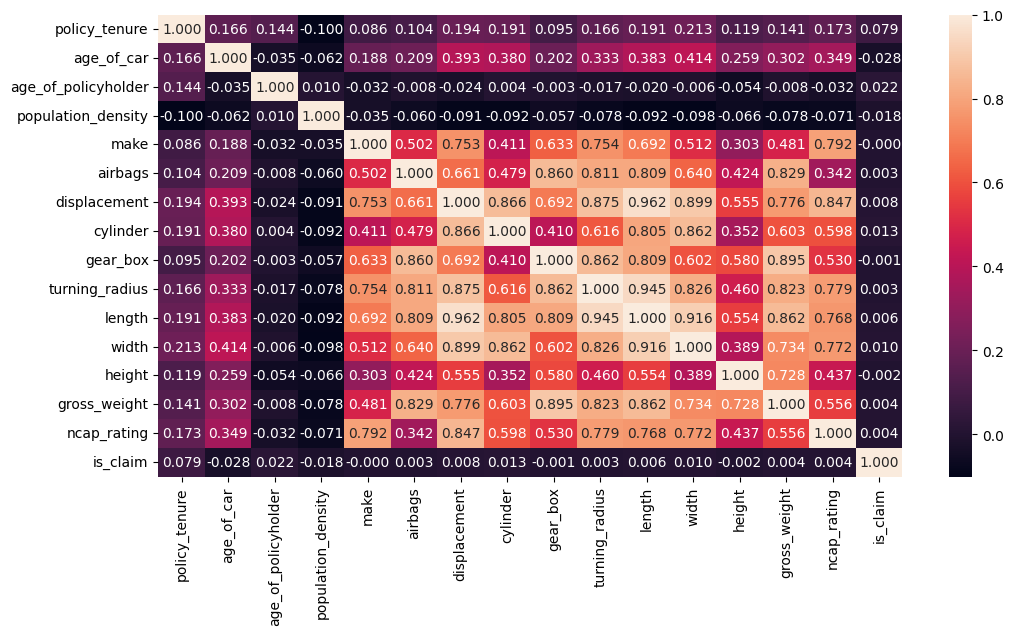

In [ ]:
#Checking the correlation between numerical features

plt.figure(figsize = (12, 6))
sns.heatmap(df.corr(), annot = True, fmt = ".3f")

In [ ]:
#Drop the columns with least correlation to 'is_claim'

df.drop(columns=['make','gear_box','height'], inplace=True)

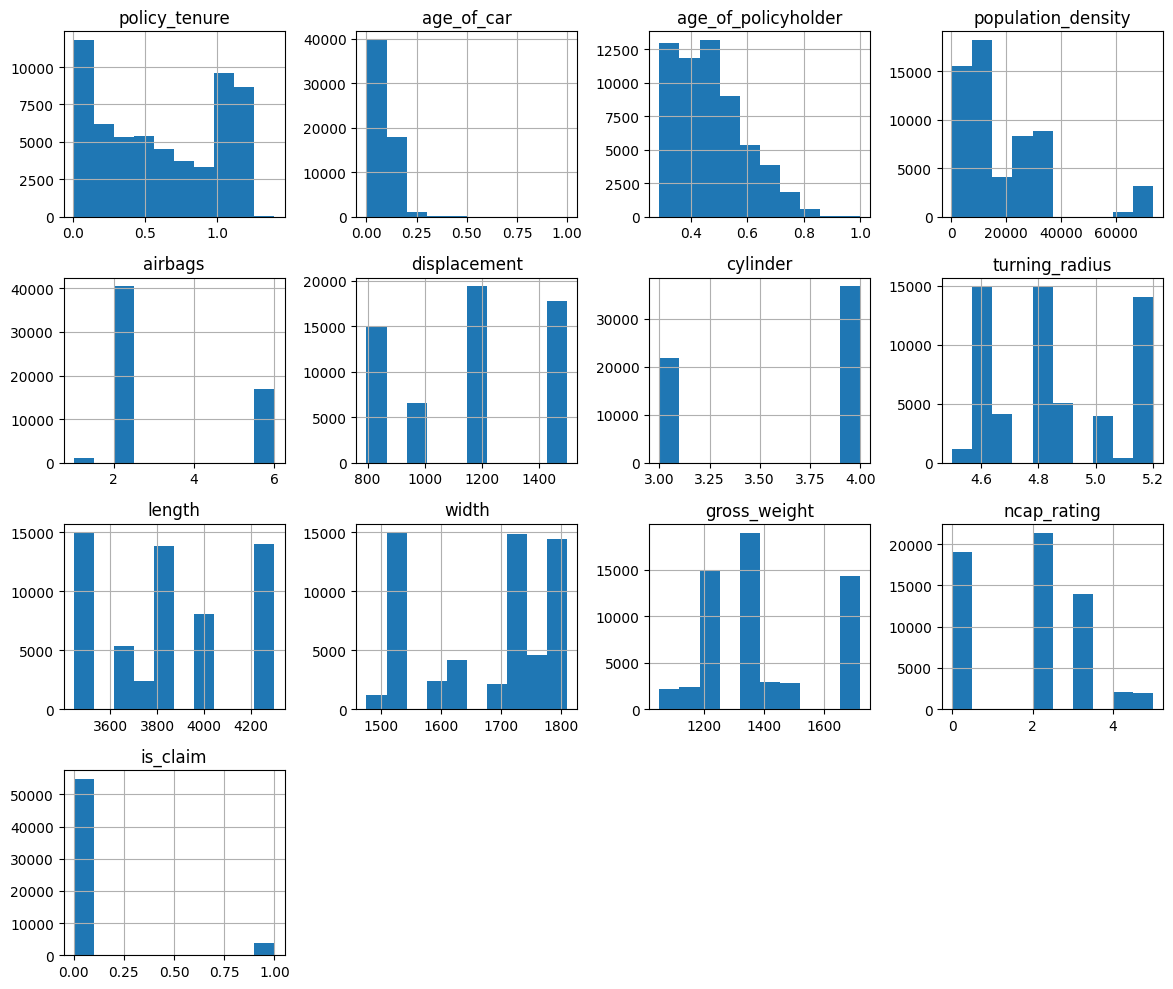

In [ ]:
#Histogram of numerical data

df.hist(figsize=(12, 10))
plt.tight_layout() # Automatically adjust the subplot area, so that it fits in the figure area
plt.show()

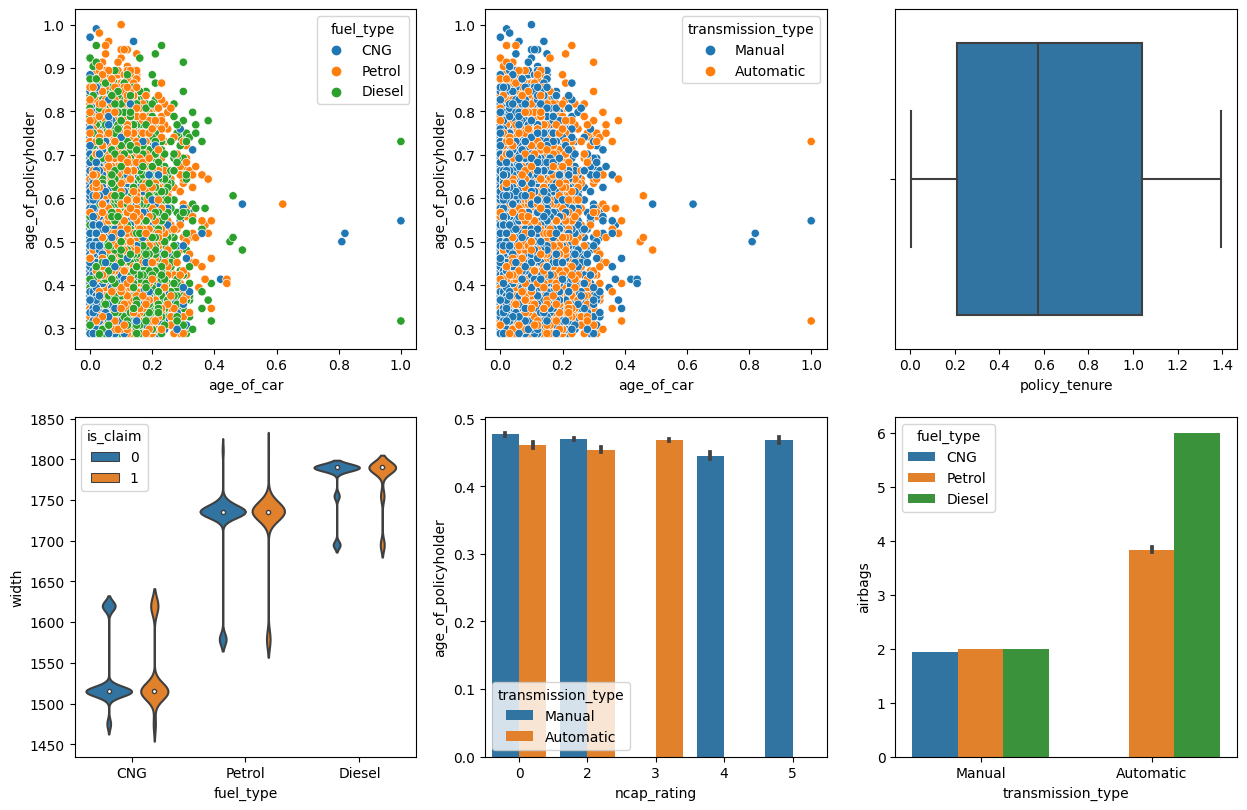

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.scatterplot(x ='age_of_car',y ='age_of_policyholder',hue="fuel_type",data = df)
plt.subplot(3,3,2)
sns.scatterplot(x="age_of_car",y="age_of_policyholder",hue="transmission_type",data=df)
plt.subplot(3,3,3)
sns.boxplot(x='policy_tenure',data=df)
# sns.barplot(x="area_cluster",y="age_of_policyholder",data=df)
plt.subplot(3,3,4)
sns.violinplot(x="fuel_type",y="width",hue="is_claim",data=df)
plt.subplot(3,3,5)
sns.barplot(x="ncap_rating",y="age_of_policyholder",hue="transmission_type",data=df)
plt.subplot(3,3,6)
sns.barplot(x="transmission_type",y="airbags",hue="fuel_type",data=df)
plt.show()


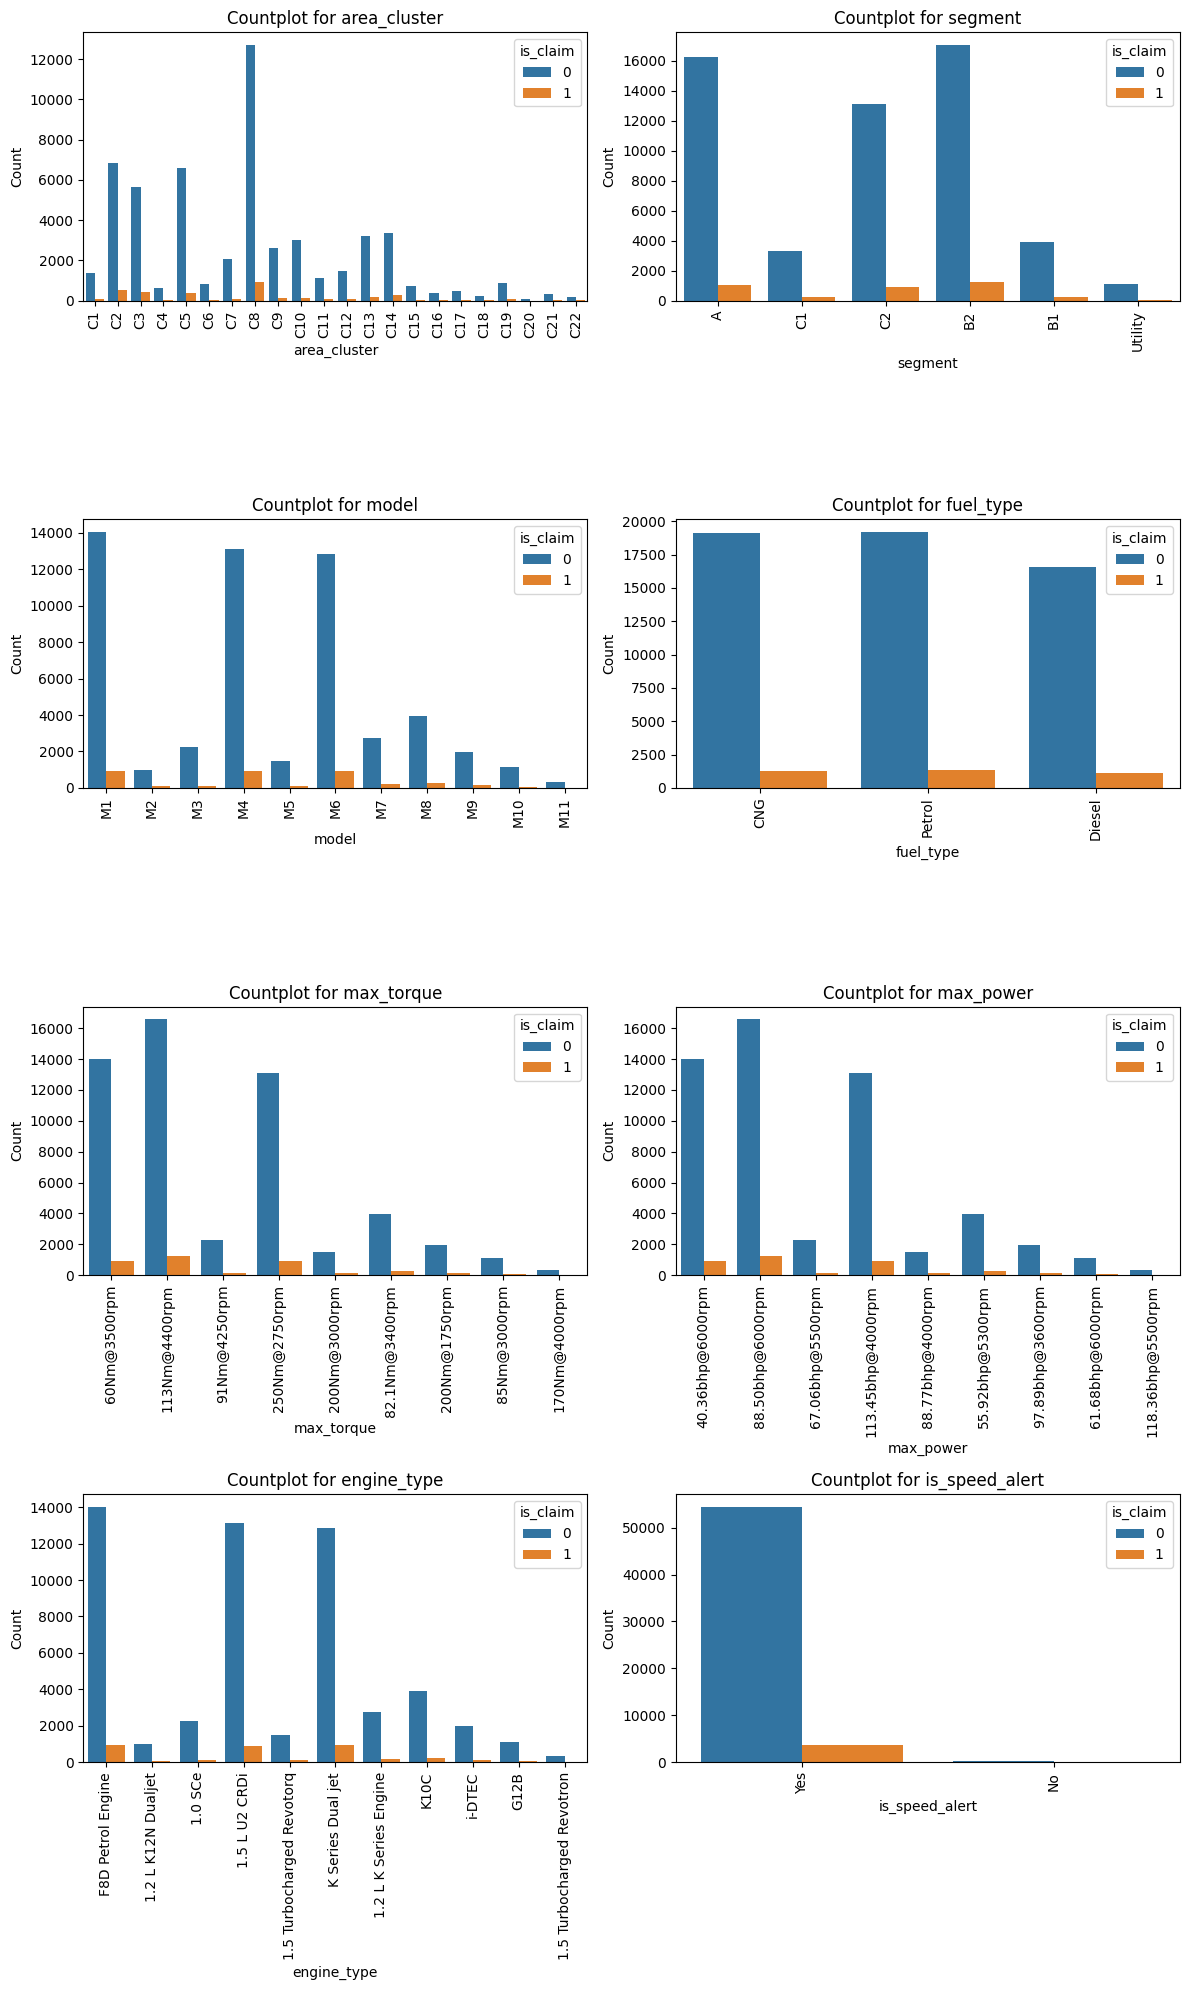

In [ ]:
# Create the figure and subplots

fig, axes = plt.subplots(4,2, figsize=(12,20))
axes = axes.flatten()

cols_1=['area_cluster', 'segment', 'model', 'fuel_type', 'max_torque','max_power', 'engine_type', 'is_speed_alert']

for i, column in enumerate(cols_1):    # enumerate is useful for obtaining an indexed list
    ax = axes[i]  # Select the current subplot

    # Plot the countplot
    sns.countplot(data=df, x=column, ax=ax, hue='is_claim')
    ax.set_title(f'Countplot for {column}')

    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels if need

plt.tight_layout()
plt.show()

#Preprocessing

In [ ]:
# Converting Categorical data type to numerical data type

df_columns=df.columns
le=LabelEncoder()

for column in df.columns:
  if dict(df.dtypes)[column] == 'object':
    df[column]= le.fit_transform(df[column])
df.head(10)

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,segment,model,fuel_type,max_torque,max_power,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,0.05,0.644231,0,4990,0,0,0,5,2,...,0,0,0,1,0,0,0,1,0,0
1,0.672619,0.02,0.375000,11,27003,0,0,0,5,2,...,0,0,0,1,0,0,0,1,0,0
2,0.841110,0.02,0.384615,15,4076,0,0,0,5,2,...,0,0,0,1,0,0,0,1,0,0
3,0.900277,0.11,0.432692,16,21622,3,3,2,0,6,...,1,1,1,1,1,1,1,1,2,0
4,0.596403,0.11,0.634615,17,34738,0,4,2,8,5,...,0,1,1,1,0,1,1,1,2,0
5,1.018709,0.07,0.519231,18,13051,4,5,1,4,0,...,1,1,1,1,1,0,1,1,3,0
6,0.097992,0.16,0.403846,19,6112,2,6,1,3,7,...,0,1,1,1,0,0,1,1,5,0
7,0.509085,0.14,0.423077,20,8794,2,7,2,0,6,...,1,1,1,1,1,1,1,1,2,0
8,0.282394,0.07,0.298077,19,6112,4,5,1,4,0,...,1,1,1,1,1,0,1,1,3,0
9,0.566255,0.04,0.442308,21,17804,2,8,2,0,6,...,1,1,1,1,1,1,1,1,0,0


<Axes: >

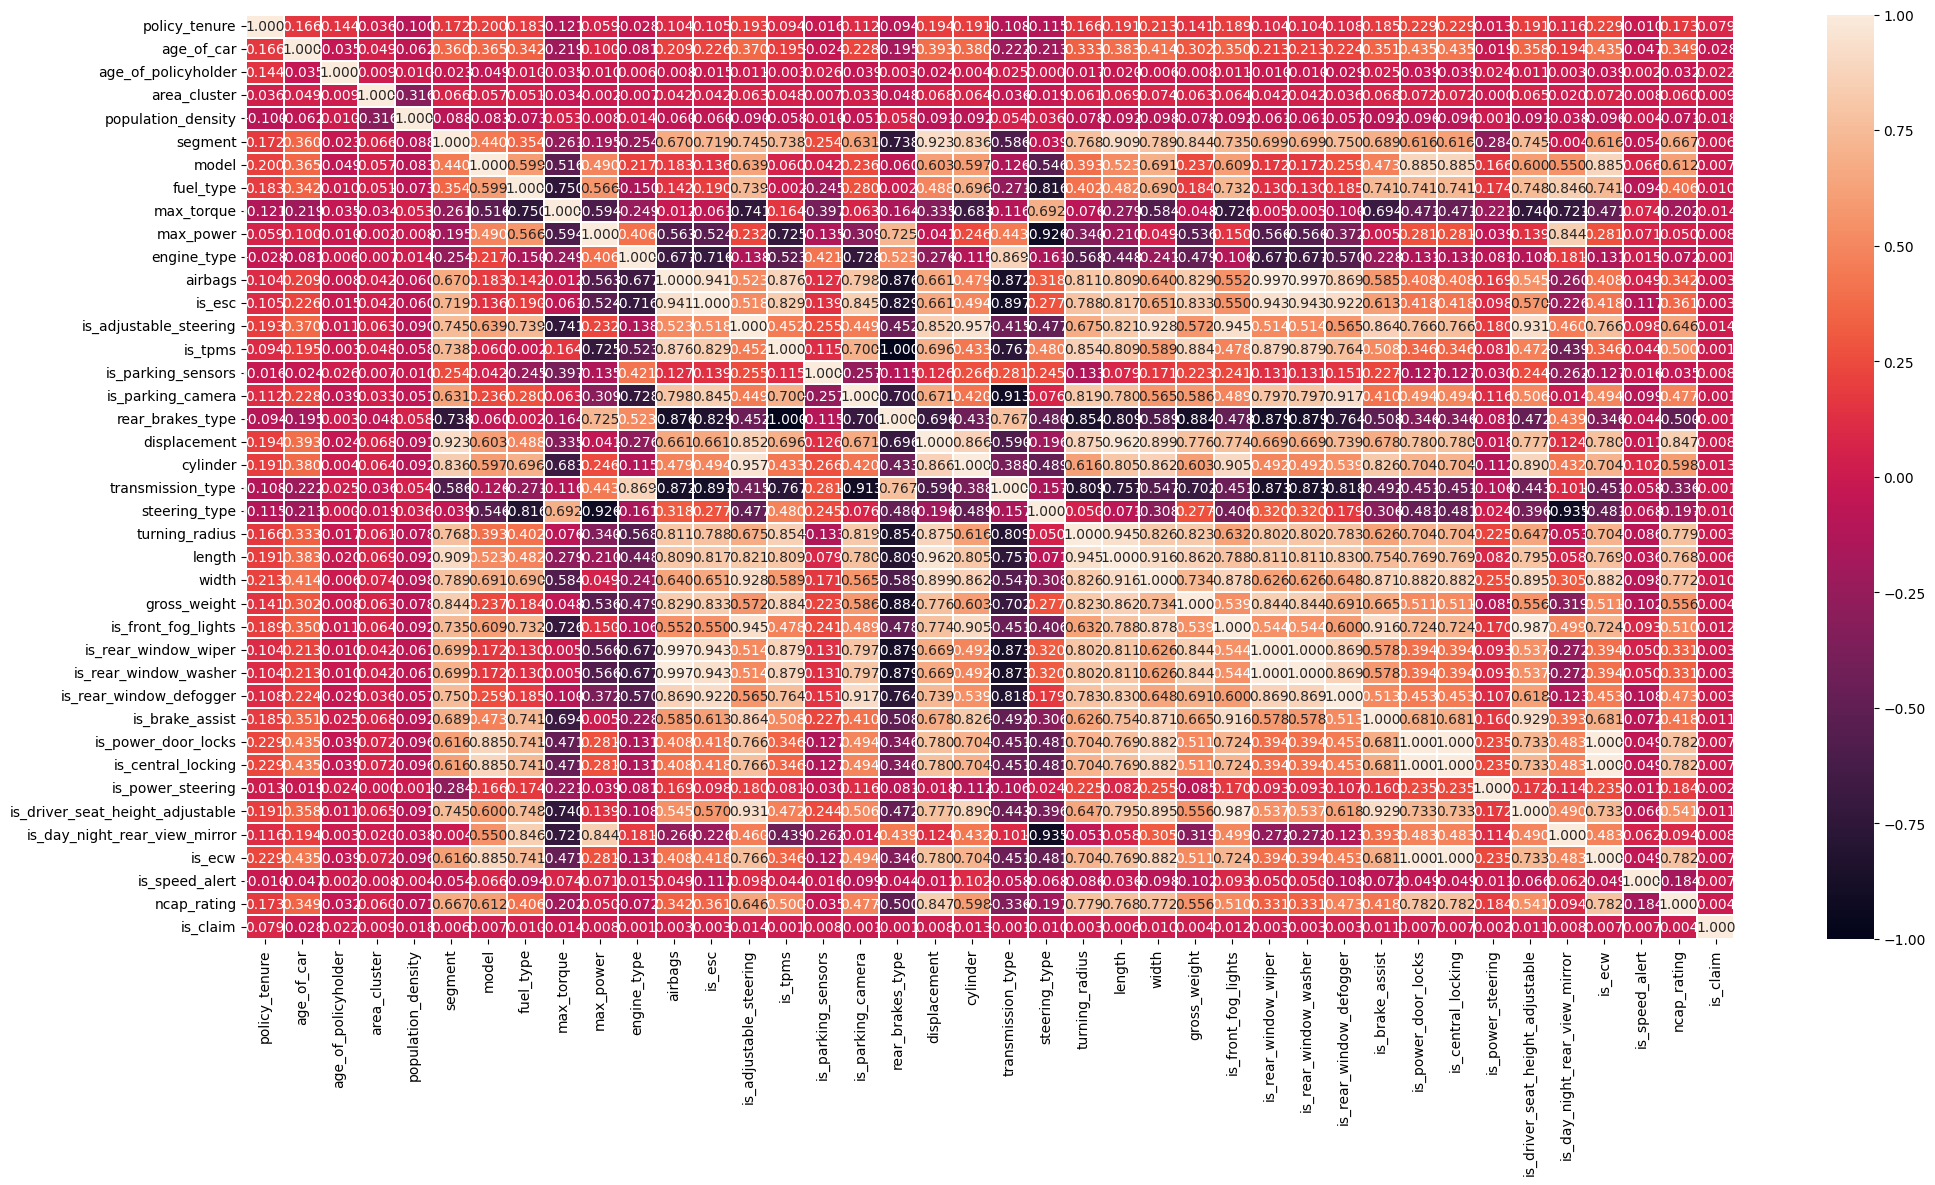

In [ ]:
plt.figure(figsize = (24, 12))
sns.heatmap(df.corr(),  linewidth=.2, annot = True, fmt = ".3f")

In [ ]:
cor=df.corr()["is_claim"].sort_values(ascending=False)
corr_df=pd.DataFrame({"column":cor.index,"Correlation with is_claim":cor.values})
corr_df

,column,Correlation with is_claim
0,age_of_car,-0.028172
1,population_density,-0.017808
2,max_torque,-0.014390
3,steering_type,-0.009608
4,is_power_steering,0.002128
5,is_rear_window_defogger,0.002588
6,is_rear_window_washer,0.002651
7,is_rear_window_wiper,0.002651
8,turning_radius,0.002724
9,airbags,0.002789


In [ ]:
df.drop(columns=[ 'is_tpms','engine_type','transmission_type','rear_brakes_type', 'is_parking_camera'],inplace=True)

In [ ]:
#Seperating the dataset into features (X) and target (y)

X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
y.value_counts()

0    54844
1     3748
Name: is_claim, dtype: int64

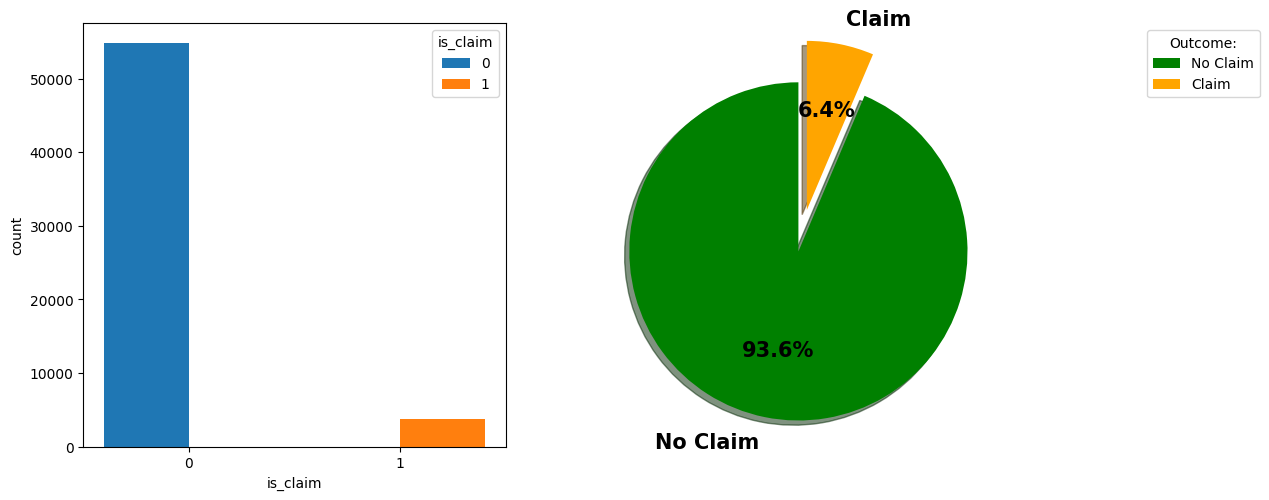

In [ ]:
#Check for the imbalanced dataset

fig = plt.figure(figsize=(12,5.5))
ax1 = fig.add_subplot(1, 2, 1)
sns.countplot(x=y,data=df,saturation=1,hue=y)


ax2 = fig.add_subplot(1, 2, 2)

plt.pie(y.value_counts(),labels=['No Claim','Claim'],radius=1,colors = ['green','orange'],
        autopct='%1.1f%%',explode = [0.1,0.15],labeldistance=1.15, shadow=True,startangle = 90,
        textprops={'fontsize': 15,'fontweight':'bold'})

plt.legend(title = 'Outcome:',loc='upper right', bbox_to_anchor=(1.6,1))
plt.show()

In [ ]:
oversample = SMOTE(random_state=1, sampling_strategy=0.3)
X_os,y_os = oversample.fit_resample(X,y)

In [ ]:
X_os.shape, y_os.shape

((71297, 34), (71297,))

In [ ]:
y_os.value_counts()

0    54844
1    16453
Name: is_claim, dtype: int64

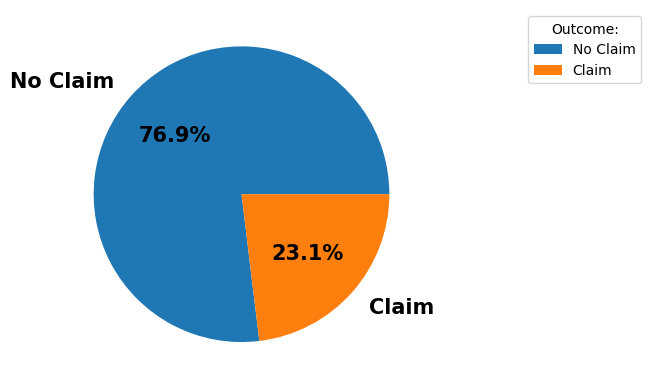

In [ ]:
plt.pie(y_os.value_counts(),labels=['No Claim','Claim'],radius=1,
        autopct='%1.1f%%',labeldistance=1.15,
        textprops={'fontsize': 15,'fontweight':'bold'})

plt.legend(title = 'Outcome:',loc='upper right', bbox_to_anchor=(1.6,1))
plt.show()

In [ ]:
#Scaling the data

scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X_os,y_os)

In [ ]:
# splitting train, test data

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y_os,test_size=0.2,random_state=12)
X_train.shape,y_train.shape

((57037, 34), (57037,))

In [ ]:
# knn=KNeighborsClassifier()
# nb=GaussianNB()
# rf=RandomForestClassifier(random_state=1)
# ad=AdaBoostClassifier(random_state=1)
# dt=DecisionTreeClassifier(max_depth=4)
clfs={
    'KNeighborsClassifier':KNeighborsClassifier(),
    'GaussianNB' : GaussianNB(),
    'RandomForestClassifier':RandomForestClassifier(random_state=12),
    'AdaBoostClassifier' :AdaBoostClassifier(random_state=12),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=4)
}
# li=[knn,nb,rf,dt,ad]
models_report = pd.DataFrame(columns=['model name', 'accuracy', 'recall', 'precision', 'f1 score'])
for clf,clf_name in list(zip(clfs.values(), clfs.keys())):
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  report={
        'model name' : clf_name,
        'accuracy' : accuracy_score(y_test,y_pred),
        'recall' : recall_score(y_test,y_pred),
        'precision' : precision_score(y_test,y_pred),
        'f1 score' : f1_score(y_test,y_pred),
  }
  models_report = models_report.append(report, ignore_index=True)
models_report = models_report.sort_values(by='accuracy', ascending=False)
models_report

,model name,accuracy,recall,precision,f1 score
2,RandomForestClassifier,0.884292,0.608385,0.860025,0.712644
0,KNeighborsClassifier,0.805610,0.600952,0.585627,0.593190
3,AdaBoostClassifier,0.781276,0.083259,0.886076,0.152215
4,DecisionTreeClassifier,0.776297,0.051442,1.000000,0.097851
1,GaussianNB,0.738569,0.123996,0.347790,0.182815


#Hyperparameter Tuning

In [ ]:
clf= KNeighborsClassifier()
params={'n_neighbors':[3,5,7,9],
        'weights':['uniform','distance'],
        'algorithm':['auto','ball_tree','kd_tree','brute']}
grid_search=GridSearchCV(clf,params,cv=3,scoring='accuracy')
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
# Print the best hyperparameters and accuracy score
print("Best: %f using %s" % ((grid_search.best_score_)*100, grid_search.best_params_))

Best: 81.885441 using {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}


In [ ]:
knn=KNeighborsClassifier(n_neighbors=9, weights='distance',algorithm='auto')
knn.fit(X_train,y_train)

# Making predictions
y_train_pred = knn.predict(X_train)
y_test_pred  = knn.predict(X_test)

KNeighborsClassifier Training data Classification Report 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     43947
           1       1.00      1.00      1.00     13090

    accuracy                           1.00     57037
   macro avg       1.00      1.00      1.00     57037
weighted avg       1.00      1.00      1.00     57037



KNeighborsClassifier Testing data Classification Report 

               precision    recall  f1-score   support

           0       0.89      0.89      0.89     10897
           1       0.64      0.64      0.64      3363

    accuracy                           0.83     14260
   macro avg       0.77      0.77      0.77     14260
weighted avg       0.83      0.83      0.83     14260



KNeighborsClassifier Training data Confusion Matrix : 


KNeighborsClassifier Testing data Confusion Matrix : 


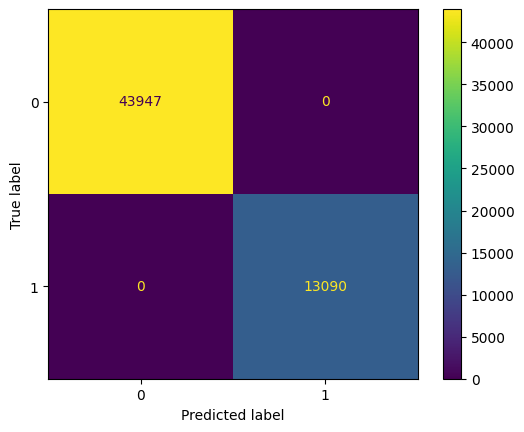

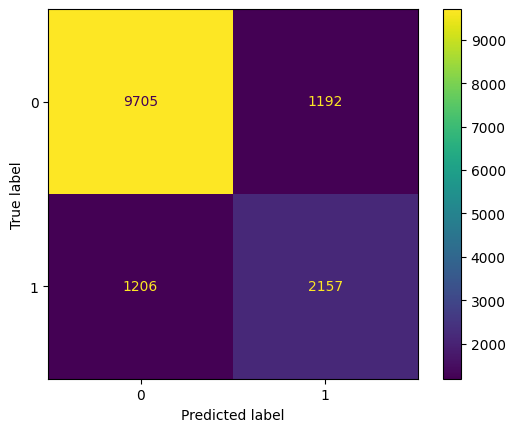

In [ ]:
knn_train_data_accuracy=accuracy_score(y_train, y_train_pred)
knn_test_data_accuracy= accuracy_score(y_test, y_test_pred)
print('KNeighborsClassifier Training data Classification Report \n\n',classification_report(y_train, y_train_pred))
print('\n')
print('KNeighborsClassifier Testing data Classification Report \n\n',classification_report(y_test, y_test_pred))
print('\n')
print ("KNeighborsClassifier Training data Confusion Matrix : \n", ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred))
print('\n')
print ("KNeighborsClassifier Testing data Confusion Matrix : \n", ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred))

In [ ]:
clf=RandomForestClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [250,300],
    'max_depth': [20, 25,30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [20, 25, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [250, 300]})

In [ ]:
# Print the best hyperparameters and accuracy score

print("Best: %f using %s" % (grid_search.best_score_*100, grid_search.best_params_))

In [ ]:
rf=RandomForestClassifier(n_estimators=,max_depth=,min_samples_split=,min_samples_leaf=,max_features=,bootstrap=)
rf.fit(X_train,y_train)
y_train_pred = rf.predict(X_train)
y_test_pred  = rf.predict(X_test)

In [ ]:
rf_train_data_accuracy=accuracy_score(y_train, y_train_pred)
rf_test_data_accuracy= accuracy_score(y_test, y_test_pred)

print('RandomForestClassifier Training data Classification Report \n\n',classification_report(y_train, y_train_pred))
print('\n')
print('RandomForestClassifier Testing data Classification Report \n\n',classification_report(y_test, y_test_pred))
print('\n')
print ("RandomForestClassifier Training data Confusion Matrix : \n", ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred))
print('\n')
print ("RandomForestClassifier Testing data Confusion Matrix : \n", ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred))

In [ ]:
cols={
    'model name':['KNeighborsClassifier','RandomForestClassifier'],
    'Train data Accuracy' : [knn_train_data_accuracy,rf_train_data_accuracy],
    'Test data Accuracy' : [knn_test_data_accuracy,rf_test_data_accuracy]
}
accuracies=pd.DataFrame(columns=cols)


In [ ]:
y_new=rf.predict(scaler.transform())